<a href="https://colab.research.google.com/github/matheus97eng/Bootcamp_Alura_2021/blob/main/aula_1_1_Matheus_Maia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matheus Maia Ávila

Aluno do bootcamp de Data Science aplicada da Alura

# AULA 1

## Primeiro passo: obtendo os dados

Os dados são do SUS, públicos e podem ser obtidos através do site https://datasus.saude.gov.br/informacoes-de-saude-tabnet/. Mas para não haver percas e maior facilidade, os dados foram baixados pela Alura e postados no github. Na minha conta, fiz um fork do diretório do projeto. Os dados serão tirados de lá.

Algumas observações

In [1]:
# importando pandas

import pandas as pd

# extraindo os dados

dados_url = 'https://github.com/matheus97eng/agendamento-hospitalar/blob/main/dados/A151346189_28_143_208.csv?raw=true'
# obs.: o url "https://github.com/matheus97eng/agendamento-hospitalar/blob/main/dados/A151346189_28_143_208.csv" não são os dados em si
# para extrair a página com somente os dados, clicamos em raw, ou então adicionamos "?raw=true"

dados = pd.read_csv(dados_url, encoding='ISO-8859-1', sep=';', skiprows=3, skipfooter=12,
                    thousands='.', decimal=',')

dados.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  if sys.path[0] == '':


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
22,43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,53637713.13,53699506.08,58730379.58,57629317.06,58779088.02,63366430.89,62200230.97,61683824.68,62495363.90,64614271.83,66457445.34,66425009.36,65782428.73,63714541.87,64488493.88,66304168.50,61527419.52,62490522.38,66814413.40,67900518.35,64799726.75,68518232.07,68731297.03,66174969.16,66891309.48,67456434.73,67096302.52,60754144.32,58884339.85,66205364.40,...,89585823.81,96174533.70,92176170.61,94228360.83,90655015.78,91242720.70,82934746.93,88817066.36,80572288.45,87419899.25,89396935.52,88148251.61,90754504.49,89093690.14,94010888.97,93664724.68,90025945.36,93081292.31,89050712.34,89664703.23,89259306.50,85585754.75,95152786.47,94163838.23,92237333.46,1.022983e+08,1.002601e+08,95917106.56,1.023316e+08,93971904.79,90775418.13,94908336.74,91437940.91,1.028761e+08,83000318.02,82381774.95,86051002.13,1.005310e+08,101374341.51,1.195865e+10
23,50 Mato Grosso do Sul,5377392.11,7002472.61,8423933.19,8797487.68,9770421.80,10905392.18,10249299.82,9671553.45,10218511.05,9547923.55,9450010.19,8365709.79,10033643.71,10746263.10,10849523.03,10902848.13,11991649.26,12050259.66,12174950.98,11178470.01,11997775.92,11686533.15,10756188.43,10565385.71,12148432.58,11270972.80,11947693.50,11435565.54,12392541.52,12441459.98,12025317.84,12353546.78,12381792.58,12340247.31,12467693.91,12356930.32,11209008.55,9656677.02,13698836.79,...,15676843.15,16956118.78,17043069.32,17477126.81,15488155.75,16596703.72,15353997.67,16320629.25,18448053.83,16620321.36,16682027.02,17555832.83,17357780.20,17090876.79,16468255.95,17395858.50,16259261.13,16390075.24,15350893.92,17108719.02,17713810.57,16882690.96,18253870.27,17778458.45,18387822.48,1.987093e+07,1.891386e+07,19591383.84,1.893544e+07,17230688.81,17895244.76,18115134.64,19542439.88,1.903279e+07,17410262.53,17913161.92,17331445.92,1.875556e+07,19241624.02,2.172158e+09
24,51 Mato Grosso,4795299.01,8684882.23,7886243.14,8794109.79,9231645.40,10221763.77,9163314.28,9243148.81,9052354.89,9677093.95,7150345.50,10421826.32,9939399.66,9332546.32,11965500.15,11185014.96,12058150.55,11635436.04,11698836.48,11823239.61,10810420.65,12130636.06,11574096.75,10726251.53,12364760.67,11382133.07,11947040.32,12233217.84,12656421.09,11263407.74,12795267.96,12805173.87,12171713.91,11961452.83,11777799.00,11142684.27,11709080.86,11149107.81,12381255.67,...,15509614.84,16372281.19,16231682.70,16044219.39,16146542.89,15487676.02,14770731.99,17253950.09,14789801.16,17498946.87,16279852.74,16103988.77,15883977.51,17163673.03,15569285.17,15630276.46,15838064.68,14815961.13,13853034.99,14229113.36,15288698.79,16045499.92,15890208.95,16092716.67,16699780.69,1.631481e+07,1.676358e+07,15608982.84,1.585564e+07,15811477.04,15029205.51,15249241.20,15046851.63,1.488682e+07,12546999.04,13604225.34,13151005.63,1.637164e+07,17790649.87,2.036924e+09
25,52 Goiás,15310637.29,22258668.68,21442515.75,20921212.45,21615970.67,18270043.87,20540517.13,20650730.67,20868443.56,20621423.04,17094580.10,21615561.61,20678552.05,23043942.78,23334312.45,23508108.16,23947606.91,24369848.15,24577126.64,24372626.65,25227845.74,24746686.90,24628958.50,25524615.37,23352380.22,23520045.07,25369725.89,24404417.4

explicando cada uma das opções read_csv:

+ os dados estão no formato 'ISO-8859-1', não em utf-8, como de costume. Sem mostrar ao pandas qual formato ele deve usar para ler o arquivo, ele não conseguirá interpretar caracteres como ~

+ sep = ';' - os dados estão separados por ; e não por "," como é o default do read_csv

+ skiprows = 3 - pula as 3 primeiras do arquivo, que não contém dados que fazem parte da tabela

+ skipfooter = 12 - pula as 12 últimas linhas do arquivo

+ thousands = '.' - diz ao pandas qual é a separação das casas de milhares

+ decimal = ',' - diz ao pandas qual é a separação das casas decimais

In [2]:
# alterando o display dos valores numéricos para algo mais amigável, com 2 casas decimais:

pd.options.display.float_format = '{:.2f}'.format

# agora podemos ver a média de cada mês:

dados.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Abr     41013660.39
2020/Mai     44193633.75
2020/Jun     47329994.46
2020/Jul     54495511.57
Total      5993731798.30
Length: 151, dtype: float64

## algumas funcionalidades pandas

In [3]:
# selecionando somente a coluna do mês de Agosto de 2008:

dados['2008/Ago']

0      3231494.61
1      2089107.14
2      9352532.70
3       894271.18
4     23341218.03
5      1475551.38
6      5413710.38
7     15195312.89
8     10549176.40
9     27851438.72
10    10640817.47
11    12872578.37
12    35457038.66
13     9373432.00
14     5238398.50
15    46931248.28
16    84722528.10
17    12588595.77
18    50912706.60
19   184854516.35
20    56982774.90
21    31250854.33
22    56113054.70
23     9671553.45
24     9243148.81
25    20650730.67
26    13710857.89
Name: 2008/Ago, dtype: float64

In [4]:
# média do mês de Agosto 2008:

dados['2008/Ago'].mean()

27800320.306666665

## primeiro gráfico

Vamos tentar fazer um primeiro gráfico, informando os gastos de cada mês por região:

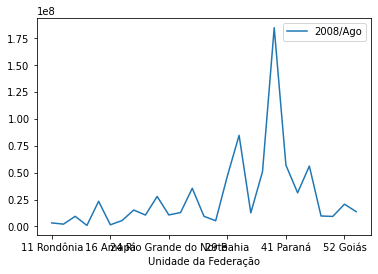

In [5]:
dados.plot(x="Unidade da Federação", y="2008/Ago")

por padrão o pandas gerou um gráfico de linhas, o que não é a melhor forma de fazer essa representação. Não existe uma relação de continuidade no eixo x, que remete às unidades de federação. O melhor gráfico para este tipo de situação é o gráfico de barras. Podemos fazer isso também com o pandas. Vamos aproveitar e aumentar o tamanho do gráfico com figsize.

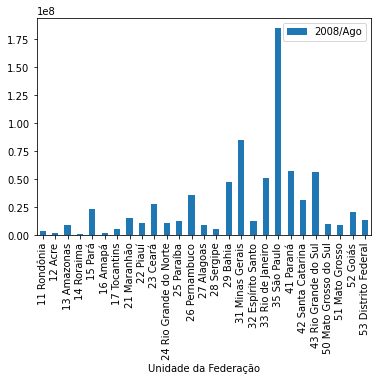

In [6]:
dados.plot(x='Unidade da Federação', y='2008/Ago', kind='bar')

agora sim está interpretativo. Mas podemos melhorar muito mais. Para isso vamos precisar da biblioteca do matplotlib. Vamos definir alguns pontos e como vamos fazer isso:

+ fazer um título com o comando plt.title()
+ retirar saídas desnecessárias, colocando por último o comando plt.show()
+ alterar a escala do eixo y para os valores mais fáceis de ligar a dinheiro
  + Para isso vamos usar uma parte do matplotlib chamada ticker

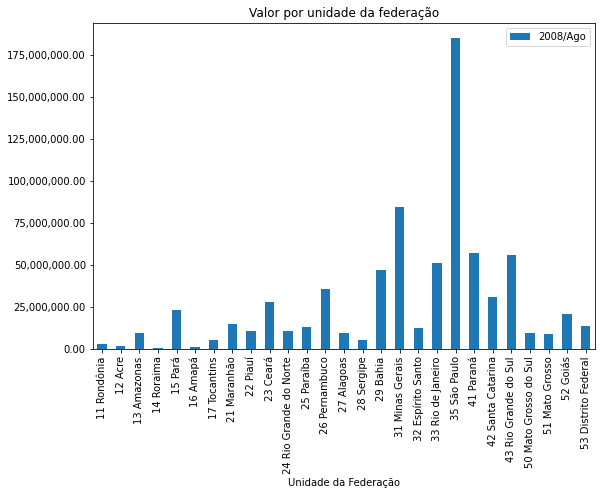

In [7]:
# importando as bibliotecas necessárias:

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# atribuímos o plot a um objeto que poderá ser alterado pelo matplotlib
ax = dados.plot(x='Unidade da Federação', y='2008/Ago', kind='bar', figsize=(9,6))

# mudando a formatação do eixo y:
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title('Valor por unidade da federação')
plt.show()

## Desafios: 

Desafio 01: Escolher um título mais descritivo, que passe a mensagem adequada ao gráfico de barras.

Desafio 02: Faça a mesma análise realizada em aula, porém para o mês mais recente.

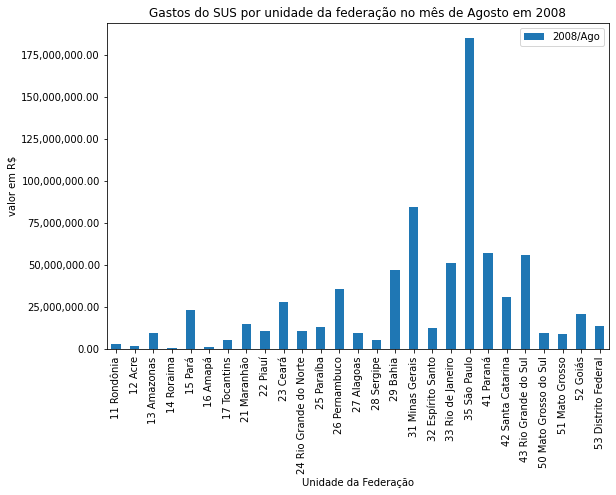

In [8]:
# Desafio 1

# atribuímos o plot a um objeto que poderá ser alterado pelo matplotlib
ax = dados.plot(x='Unidade da Federação', y='2008/Ago', kind='bar', figsize=(9,6))

# mudando a formatação do eixo y:
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title('Gastos do SUS por unidade da federação no mês de Agosto em 2008')

# vamos colocar também uma label no eixo y:
plt.ylabel('valor em R$')
plt.show()

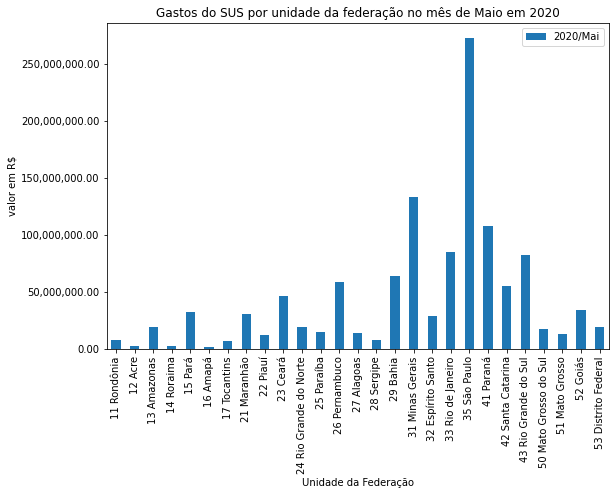

In [9]:
# Desafio 2

# atribuímos o plot a um objeto que poderá ser alterado pelo matplotlib
ax = dados.plot(x='Unidade da Federação', y='2020/Mai', kind='bar', figsize=(9,6))

# mudando a formatação do eixo y:
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title('Gastos do SUS por unidade da federação no mês de Maio em 2020')

# vamos colocar também uma label no eixo y:
plt.ylabel('valor em R$')
plt.show()

mas podemos fazer melhor do que isso...

+ vamos mudar a ordem de apresentação das barras, do menor para o maior
+ além disso, não costumamos ficar lendo números tão grandes. Quando se trata de dinheiro, usamos bilhões, milhões... vamos alterar isso no eixo y

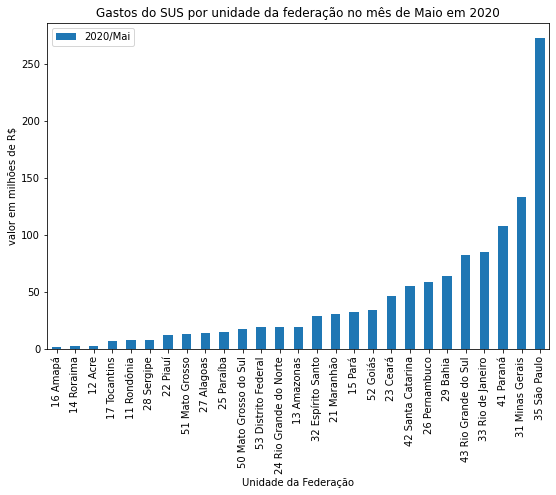

In [10]:
import seaborn as sns

# ordenando as unidades de federação pelo valor gasto:
dados_sort = dados[['Unidade da Federação', '2020/Mai']].sort_values(by='2020/Mai')

# alterando a escala dos valores dos gastos
dados_sort['2020/Mai'] = dados_sort['2020/Mai']/(10**6)

# atribuímos o plot a um objeto que poderá ser alterado pelo matplotlib
ax = dados_sort.plot(x='Unidade da Federação', y='2020/Mai', kind='bar', figsize=(9,6))

# mudando a formatação do eixo y:
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

plt.title('Gastos do SUS por unidade da federação no mês de Maio em 2020')

# vamos colocar também uma label no eixo y:
plt.ylabel('valor em milhões de R$')
plt.show()

dá pra melhorar ainda mais? SIM! Vamos usar o estilo da biblioteca seaborn para o gráfico. Além disso vamos aumentar o tamanho do título e tirar informações desncessárias

In [11]:
# alterando os nomes das Unidades de Federação
estados = dados_sort['Unidade da Federação'].values
i=0
for estado in estados:
  estados[i] = estado[3:]
  i+=1
dados_sort['Unidade da Federação'] = estados

dados_sort['Unidade da Federação']

5                   Amapá
3                 Roraima
1                    Acre
6               Tocantins
0                Rondônia
14                Sergipe
8                   Piauí
24            Mato Grosso
13                Alagoas
11                Paraíba
23     Mato Grosso do Sul
26       Distrito Federal
10    Rio Grande do Norte
2                Amazonas
17         Espírito Santo
7                Maranhão
4                    Pará
25                  Goiás
9                   Ceará
21         Santa Catarina
12             Pernambuco
15                  Bahia
22      Rio Grande do Sul
18         Rio de Janeiro
20                 Paraná
16           Minas Gerais
19              São Paulo
Name: Unidade da Federação, dtype: object

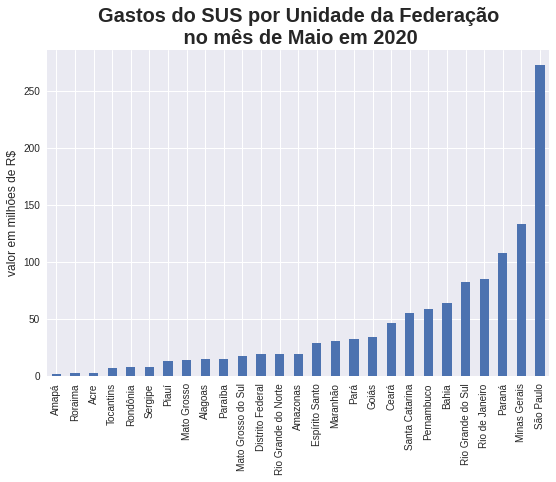

In [12]:
plt.style.use('seaborn')

# atribuímos o plot a um objeto que poderá ser alterado pelo matplotlib
ax = dados_sort.plot(x='Unidade da Federação', y='2020/Mai', kind='bar', figsize=(9,6), legend = None)

# mudando a formatação do eixo y:
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

plt.title('Gastos do SUS por Unidade da Federação\n no mês de Maio em 2020', size=20, weight='bold')

# vamos colocar também uma label no eixo y:
plt.ylabel('valor em milhões de R$', size=12)
plt.xlabel('')

# precisaremos alterar o ângulo das informações no eixo x:
plt.xticks(rotation=90)
plt.show()

## **O que aprendemos até aqui?**

### Trabalhar com dados reais
Dados no mundo real não são produzidos para uma aplicação de ciência de dados fácil. É necessário tratamento e, para saber como fazer certo as linhas de código, precisamos conhecer bem o arquivo com o qual estamos lidando, quais são as suas informações e do que falam os dados.

### Gráficos
bem... fazer um gráfico de qualidade não é uma tarefa fácil. Várias linhas de código foram escritas para chegar ao resultado final. Mas a boa notícia é que essas linhas podem ser aproveitadas para outros gráficos semelhantes. Um bom tratamento resultará em uma simples visualização, o que permite clarear exatamente os objetivos dos estudos dos dados.